In [30]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [31]:
#Load the dataset 
df = pd.read_excel('dataset.xlsx')

In [32]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [33]:
df.shape

(541909, 8)

In [34]:
df.dropna(inplace=True)

In [35]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [36]:
df.shape


(406829, 8)

In [60]:
df = df[df['InvoiceNo'] != 0]  # Keeps only the rows where 'Sales' is not zero
df = df[df['Quantity'] > 0]  # Keeps only the rows where 'Sales' is greater than or equal to zero

In [61]:
print(df[df['InvoiceNo'] == 0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country, CancelledOrder, InternationalOrders, Sales, weekday_name]
Index: []


In [39]:
print(df[df['Quantity'] < 0])

Empty DataFrame
Columns: [InvoiceNo, StockCode, Description, Quantity, InvoiceDate, UnitPrice, CustomerID, Country]
Index: []


In [40]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [56]:
df['InvoiceNo'] = df['InvoiceNo'].astype(int)
df['StockCode'] = df['StockCode'].astype(str)
df['Description'] = df['Description'].astype(str)
df['Description'] = df['Description'].str.strip()
df['CustomerID'] = df['CustomerID'].astype(int)

In [57]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

df['InvoiceNo'] = labelencoder.fit_transform(df['InvoiceNo'])

In [58]:
df.duplicated().sum()

0

In [44]:
df.drop_duplicates(inplace=True)

In [45]:
df.duplicated().sum()

0

In [46]:
# Add new column 
df['CancelledOrder'] = df['InvoiceNo'].astype(str).str.startswith('C').astype('int')
df['InternationalOrders'] = (df['Country']!='United Kingdom').astype('int')
df['Sales'] = df['Quantity']*df['UnitPrice']

In [47]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'CancelledOrder',
       'InternationalOrders', 'Sales'],
      dtype='object')

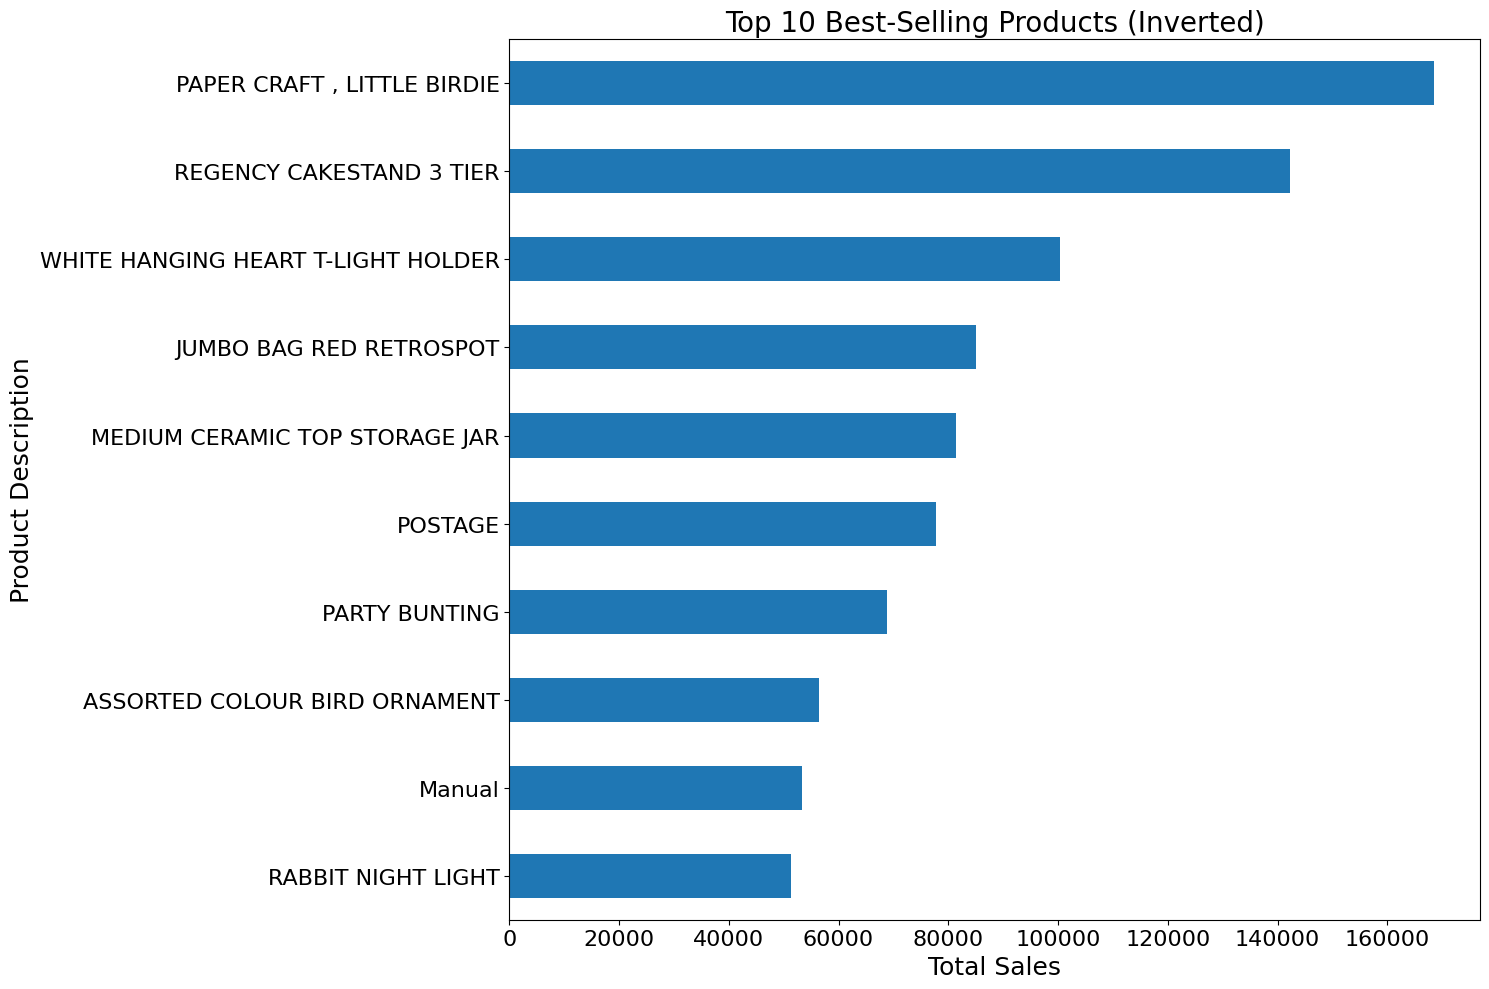

In [62]:
import matplotlib.pyplot as plt

# Grouping by 'Description', summing the 'Sales', and sorting the values
Top10products = df.groupby('Description', as_index=False)['Sales'].sum().sort_values('Sales', ascending=False).head(10)

# Plotting the horizontal bar chart
ax = Top10products.plot(x="Description", y="Sales", legend=False, kind='barh', figsize=(15,10))

# Inverting the y-axis to have the highest value at the bottom
plt.gca().invert_yaxis()

# Removing the grid
plt.grid(False)

# Setting labels and title
plt.xlabel('Total Sales', fontsize=18)
plt.ylabel('Product Description', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Top 10 Best-Selling Products (Inverted)', fontsize=20)

# Adjust layout
plt.tight_layout()  # Adjusts layout so everything fits without overlap
plt.show()


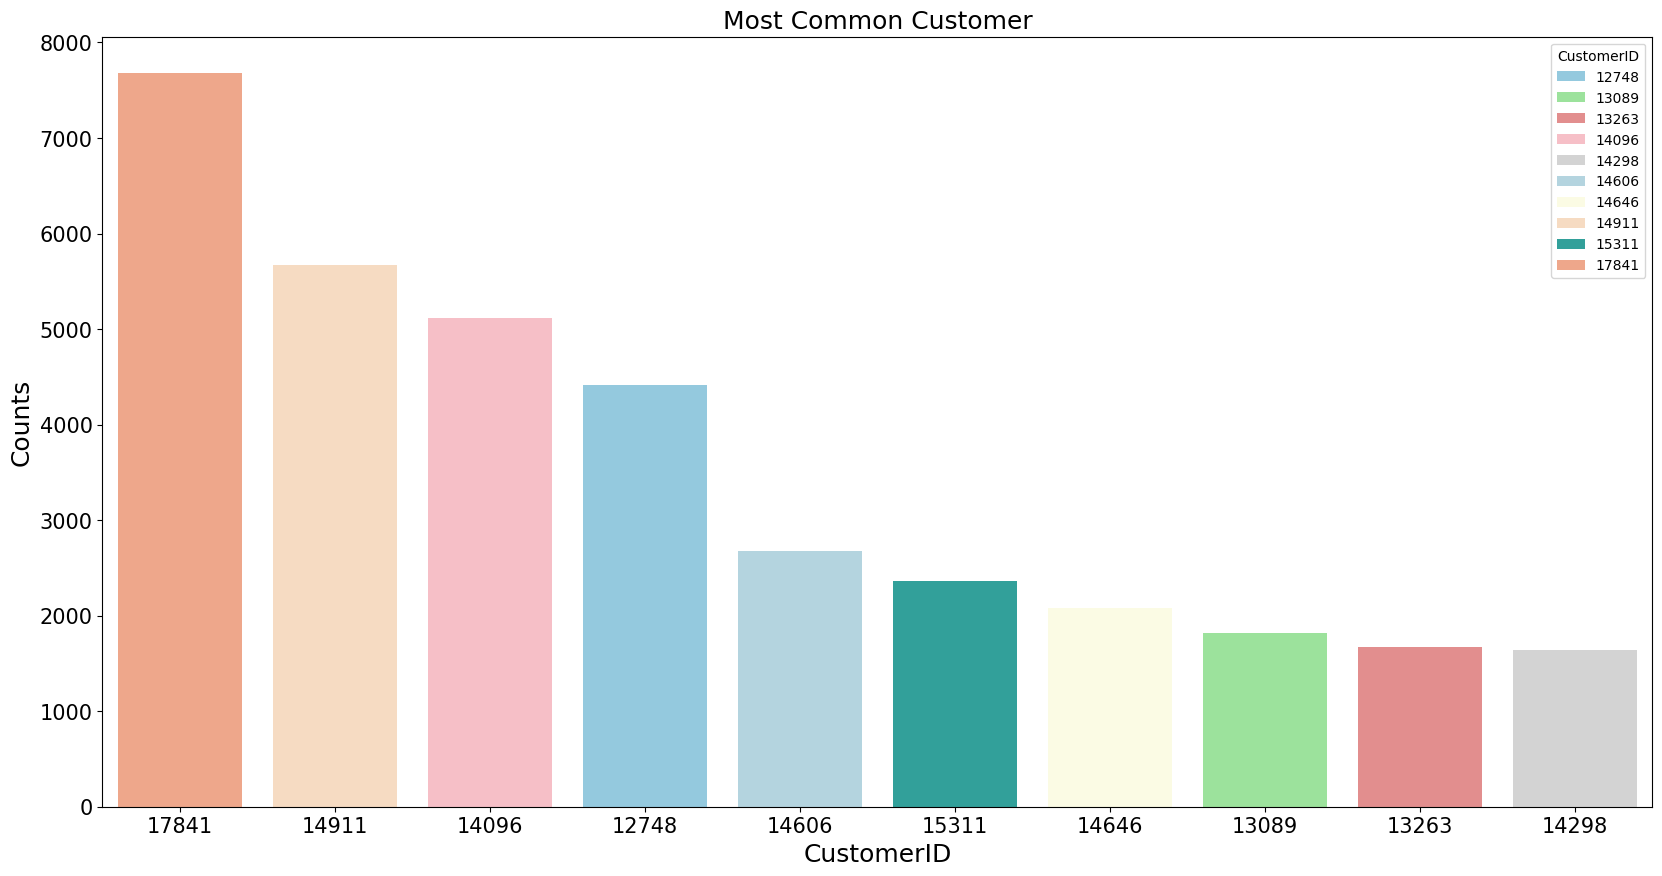

In [63]:
Top10customer = df['CustomerID'].value_counts().sort_values(ascending=False).head(10)
plt.figure(figsize=(20,10))
plt.grid(False)

X = Top10customer.index
Y = Top10customer.values

# Define a list of colors
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightgrey', 
          'lightblue', 'lightyellow', 'peachpuff', 'lightseagreen', 'lightsalmon']

# Use the palette argument to apply the list of colors
sns.barplot(x=X, y=Y, hue=X, order=Top10customer.index, palette=colors)

plt.ylabel("Counts", fontsize=18)
plt.xlabel("CustomerID", fontsize=18)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Most Common Customer", fontsize=18)
plt.show()

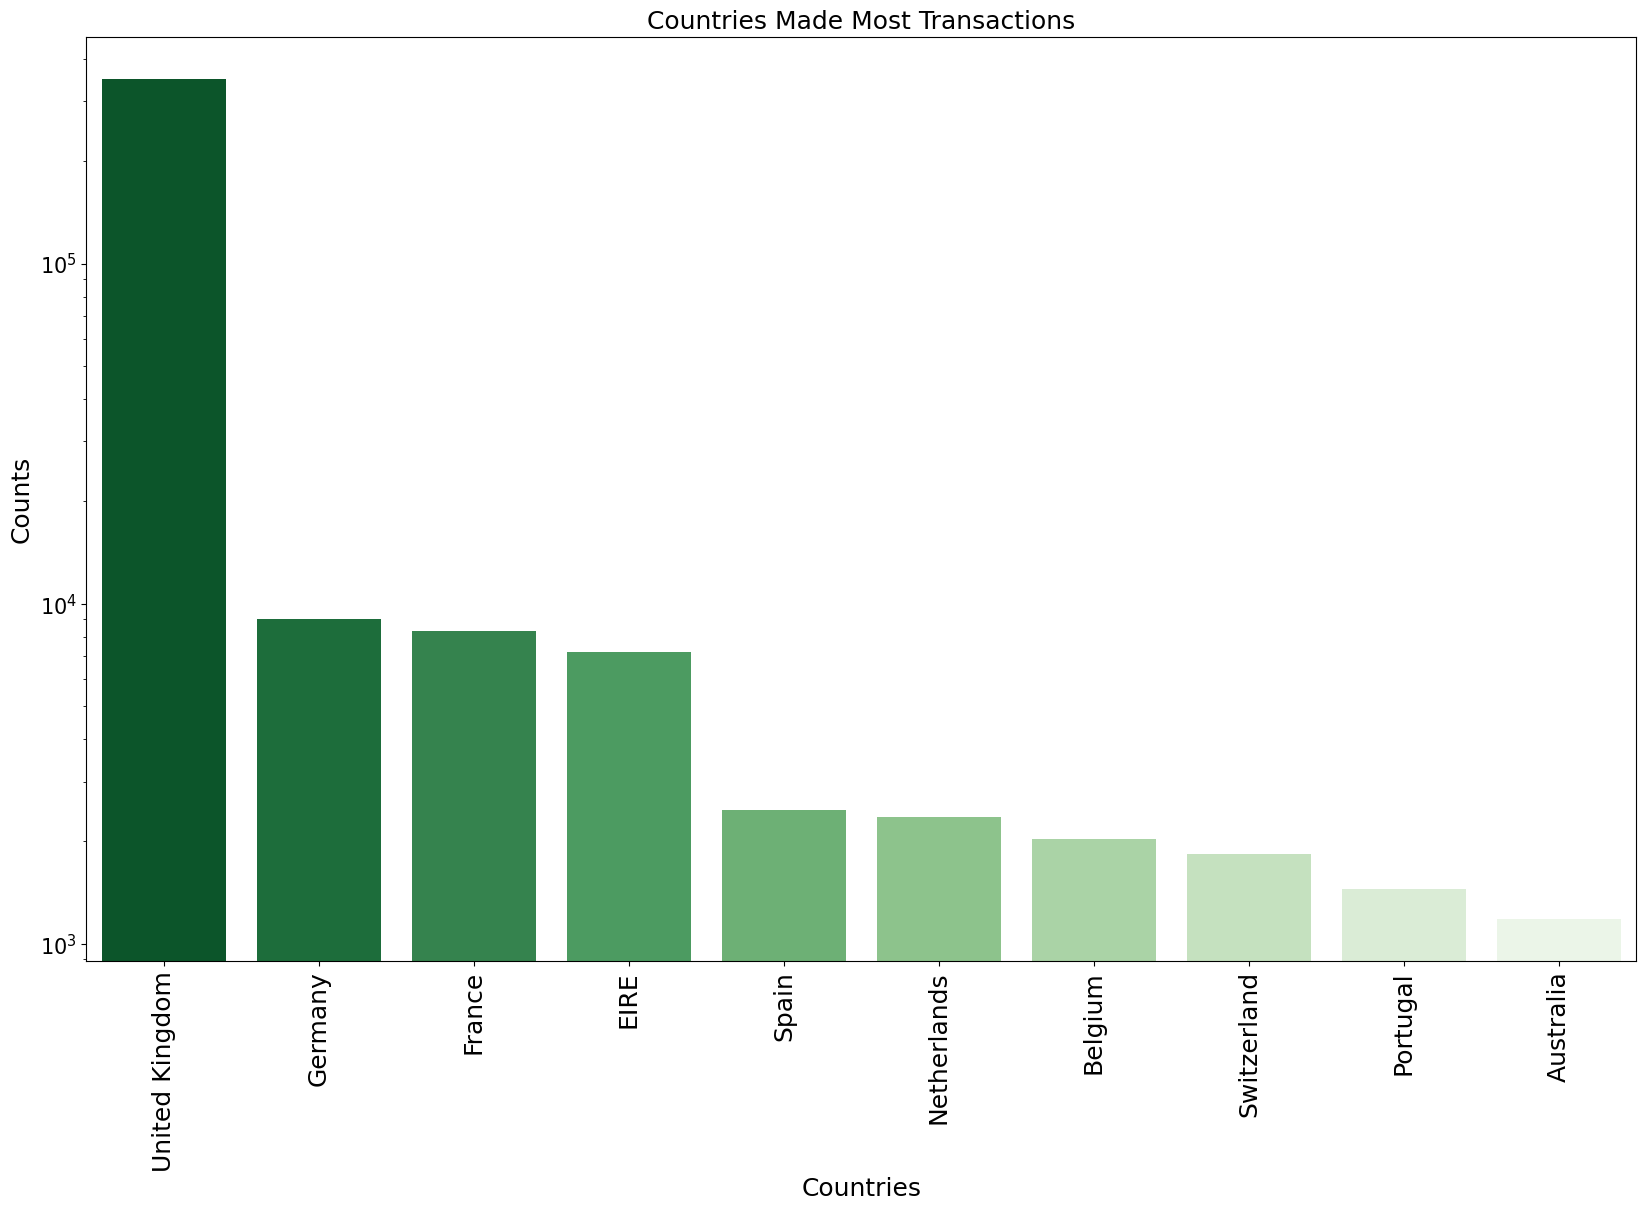

In [64]:
Top10country = df['Country'].value_counts().head(10)
plt.figure(figsize=(20,12))

X = Top10country.index
Y = Top10country.values

# Use keyword arguments for x and y in sns.barplot
plots = sns.barplot(x=X, y=Y,hue=X, palette="Greens_r")

plt.ylabel("Counts", fontsize=18)
plt.xlabel("Countries", fontsize=18)
plt.grid(False)
plt.xticks(rotation=90, fontsize=18)  # Rotates x-axis labels by 90 degrees
plt.yticks(fontsize=15)
plt.title("Countries Made Most Transactions", fontsize=18)
plt.yscale("log")  # Sets the y-axis to logarithmic scale

plt.show()

In [69]:
df['Date']=df['InvoiceDate'].copy()
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y %H:%M:%S',errors ='coerce')
df.set_index('Date',inplace = True)
df.sort_index(inplace=True)
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 392725 entries, 2010-12-01 08:28:00 to 2011-12-09 12:50:00
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   InvoiceNo            392725 non-null  int64         
 1   StockCode            392725 non-null  object        
 2   Description          392725 non-null  object        
 3   Quantity             392725 non-null  int64         
 4   InvoiceDate          392725 non-null  datetime64[ns]
 5   UnitPrice            392725 non-null  float64       
 6   CustomerID           392725 non-null  int32         
 7   Country              392725 non-null  object        
 8   CancelledOrder       392725 non-null  int32         
 9   InternationalOrders  392725 non-null  int32         
 10  Sales                392725 non-null  float64       
 11  weekday_name         392725 non-null  object        
dtypes: datetime64[ns](1), float64(2), int3

In [66]:
df['weekday_name']=df.index.strftime('%a')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledOrder,InternationalOrders,Sales,weekday_name
Date,,,,,,,,,,,,
2010-12-01 08:28:00,1,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,0,11.10,Wed
2010-12-01 08:28:00,1,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850,United Kingdom,0,0,11.10,Wed
2010-12-01 08:34:00,2,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047,United Kingdom,0,0,54.08,Wed
2010-12-01 08:34:00,2,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047,United Kingdom,0,0,12.60,Wed
2010-12-01 08:34:00,2,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047,United Kingdom,0,0,12.60,Wed


In [70]:
Week_resample = df.resample('W').count()
Week_resample.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledOrder,InternationalOrders,Sales,weekday_name
Date,,,,,,,,,,,,
2010-12-05,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539,7539
2010-12-12,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377,9377
2010-12-19,6976,6976,6976,6976,6976,6976,6976,6976,6976,6976,6976,6976
2010-12-26,1774,1774,1774,1774,1774,1774,1774,1774,1774,1774,1774,1774
2011-01-02,0,0,0,0,0,0,0,0,0,0,0,0


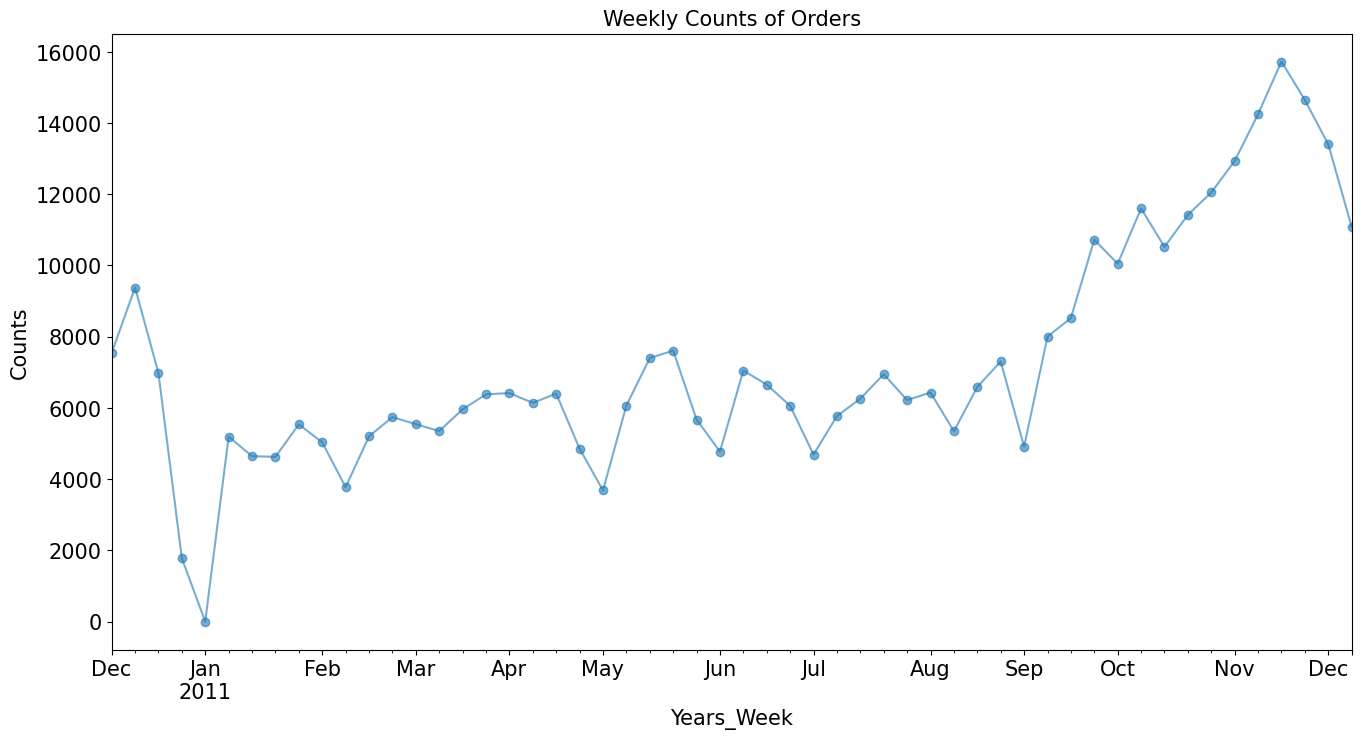

In [71]:
plt.figure(figsize = (16, 8))
Week_resample.Quantity.plot(marker = 'o',alpha = 0.6)
plt.grid(False)
plt.xlabel('Years_Week',fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Weekly Counts of Orders', fontsize=15)
plt.show()

In [72]:
Month_resample = df.resample('ME').count()
Month_resample.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledOrder,InternationalOrders,Sales,weekday_name
Date,,,,,,,,,,,,
2010-12-31,25666,25666,25666,25666,25666,25666,25666,25666,25666,25666,25666,25666
2011-01-31,20991,20991,20991,20991,20991,20991,20991,20991,20991,20991,20991,20991
2011-02-28,19707,19707,19707,19707,19707,19707,19707,19707,19707,19707,19707,19707
2011-03-31,26872,26872,26872,26872,26872,26872,26872,26872,26872,26872,26872,26872
2011-04-30,22435,22435,22435,22435,22435,22435,22435,22435,22435,22435,22435,22435


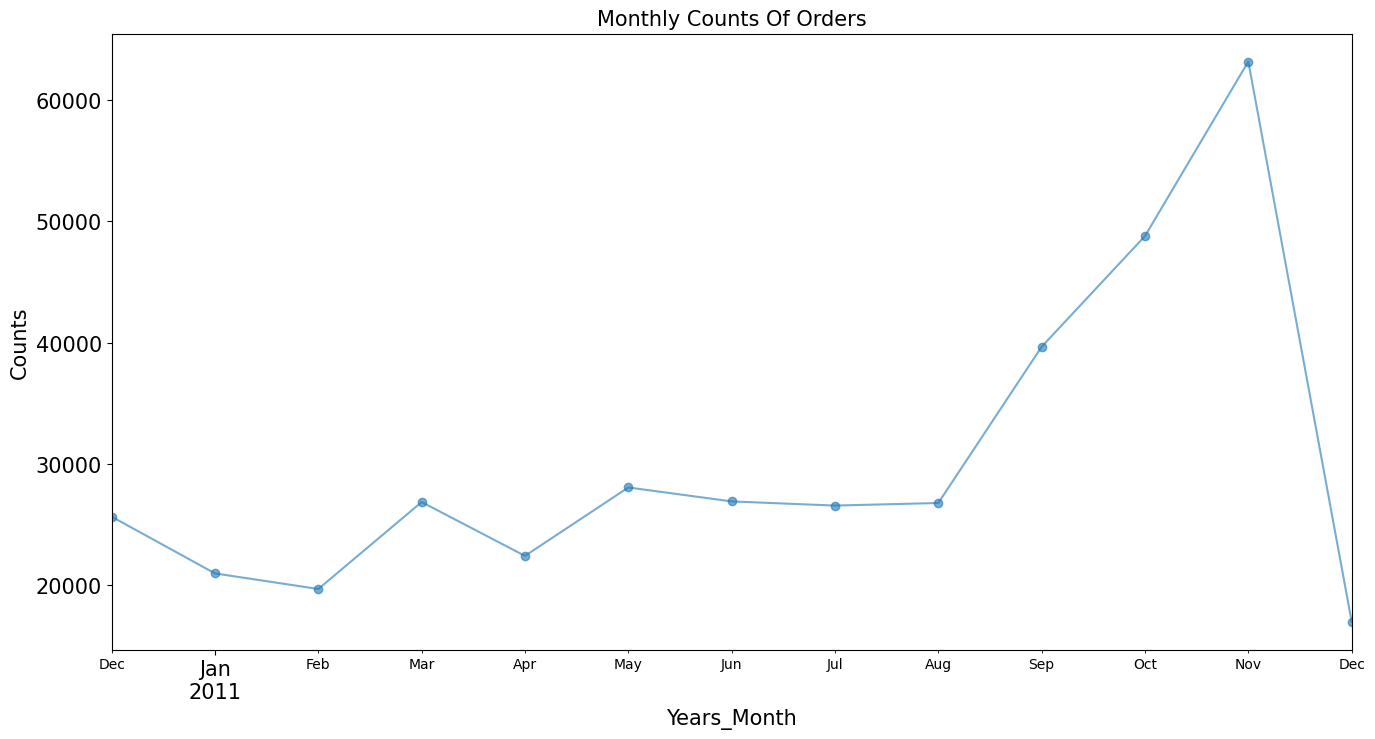

In [73]:
plt.figure(figsize = (16, 8))
Month_resample.Quantity.plot(marker = 'o',alpha = 0.6)
plt.xlabel('Years_Month',fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.grid(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Monthly Counts Of Orders', fontsize=15)
plt.show()

In [74]:
Day_resample = df.resample('D').count()
Day_resample.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledOrder,InternationalOrders,Sales,weekday_name
Date,,,,,,,,,,,,
2010-12-01,1891,1891,1891,1891,1891,1891,1891,1891,1891,1891,1891,1891
2010-12-02,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959,1959
2010-12-03,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086,1086
2010-12-04,0,0,0,0,0,0,0,0,0,0,0,0
2010-12-05,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603


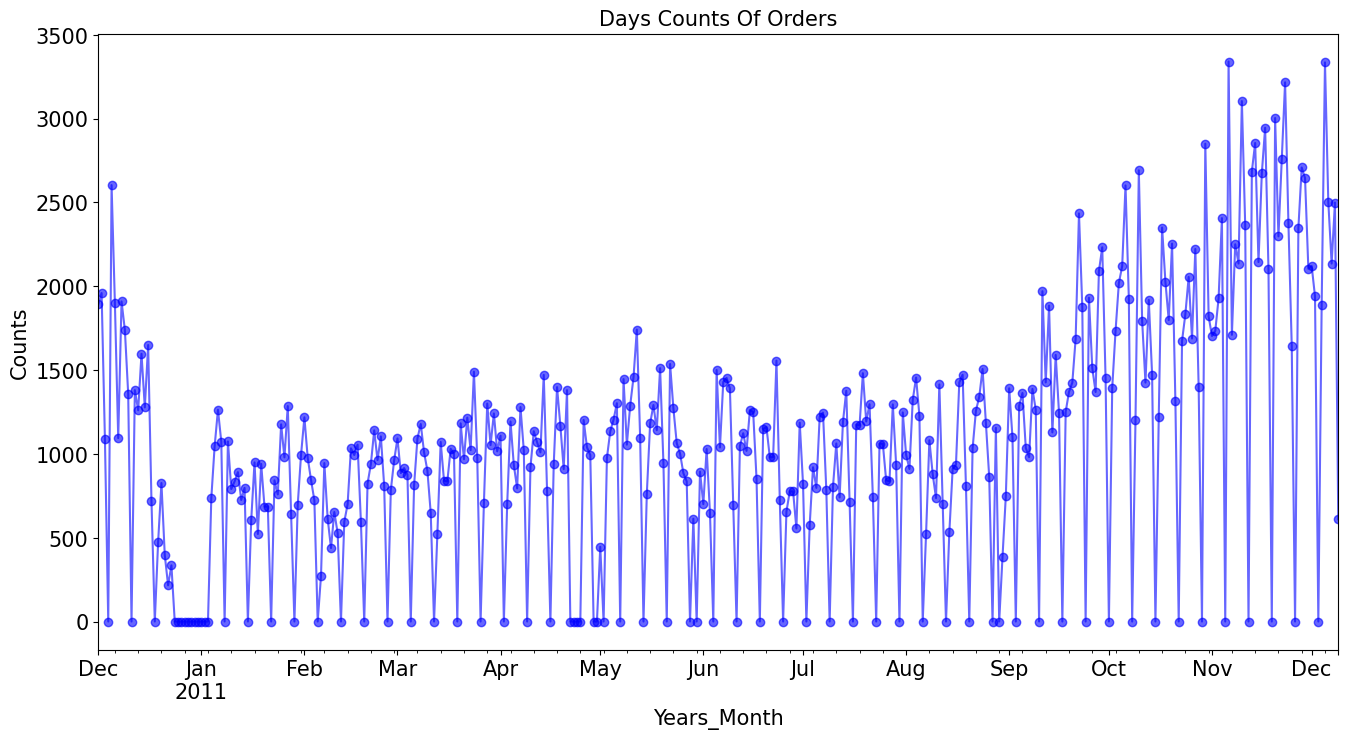

In [79]:
plt.figure(figsize = (16, 8))
Day_resample.Quantity.plot(marker='o',color = 'blue',alpha = 0.6)#marker='o'
plt.xlabel('Years_Month',fontsize=15)
plt.ylabel('Counts', fontsize=15)
plt.grid(False)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Days Counts Of Orders', fontsize=15)
plt.show()

In [80]:
# Convert InvoiceDate to datetime object
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'].head()

Date
2010-12-01 08:28:00   2010-12-01 08:28:00
2010-12-01 08:28:00   2010-12-01 08:28:00
2010-12-01 08:34:00   2010-12-01 08:34:00
2010-12-01 08:34:00   2010-12-01 08:34:00
2010-12-01 08:34:00   2010-12-01 08:34:00
Name: InvoiceDate, dtype: datetime64[ns]

In [81]:
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [84]:
# Convert 'InvoiceDate' to datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors='coerce')

# Now you can safely extract date components
df['year'] = df['InvoiceDate'].dt.year
df['Month'] = df['InvoiceDate'].dt.month
df['Quarter'] = df['InvoiceDate'].dt.quarter
df['Week'] = df['InvoiceDate'].dt.isocalendar().week  # Use isocalendar().week for week number
df['Weekday'] = df['InvoiceDate'].dt.weekday
df['Day'] = df['InvoiceDate'].dt.day
df['Dayofyear'] = df['InvoiceDate'].dt.dayofyear

# Assuming 'Sales' and 'Quantity' columns exist
df['UnitPrice'] = df['Sales'] / df['Quantity']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,CancelledOrder,InternationalOrders,Sales,weekday_name,year,Month,Quarter,Week,Weekday,Day,Dayofyear
Date,,,,,,,,,,,,,,,,,,,
2010-12-01 08:28:00,1,22633,HAND WARMER UNION JACK,6,2010-12-01,1.85,17850,United Kingdom,0,0,11.10,Wed,2010,12,4,48,2,1,335
2010-12-01 08:28:00,1,22632,HAND WARMER RED POLKA DOT,6,2010-12-01,1.85,17850,United Kingdom,0,0,11.10,Wed,2010,12,4,48,2,1,335
2010-12-01 08:34:00,2,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01,1.69,13047,United Kingdom,0,0,54.08,Wed,2010,12,4,48,2,1,335
2010-12-01 08:34:00,2,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01,2.10,13047,United Kingdom,0,0,12.60,Wed,2010,12,4,48,2,1,335
2010-12-01 08:34:00,2,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01,2.10,13047,United Kingdom,0,0,12.60,Wed,2010,12,4,48,2,1,335


In [86]:
# Drop rows with negative Quantity
from scipy import stats
df = df.drop(df[df.Quantity<=0].index).reset_index(drop=True)
df = df.drop(df[df.Sales<=0].index).reset_index(drop=True)

#Removing outliers 
df = df[(np.abs(stats.zscore(df['Quantity'])) < 3)]
df = df[(np.abs(stats.zscore(df['Sales'])) < 3)]
df.describe()

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,CancelledOrder,InternationalOrders,Sales,year,Month,Quarter,Week,Weekday,Day,Dayofyear
count,375584.000000,375584.000000,375584,375584.000000,375584.000000,375584.0,375584.000000,375584.000000,375584.000000,375584.000000,375584.000000,375584.0,375584.000000,375584.000000,375584.000000
mean,9725.231810,8.245455,2011-07-10 15:08:12.749425152,2.860773,15298.764380,0.0,0.104110,13.952722,2010.934699,7.613248,2.856815,30.968516,2.620647,15.053975,215.465558
min,1.000000,1.000000,2010-12-01 00:00:00,0.001000,12347.000000,0.0,0.000000,0.001000,2010.000000,1.000000,1.000000,1.0,0.000000,1.000000,4.000000
25%,4959.000000,2.000000,2011-04-07 00:00:00,1.250000,13969.000000,0.0,0.000000,4.560000,2011.000000,5.000000,2.000000,19.0,1.000000,7.000000,130.000000
50%,10124.000000,5.000000,2011-07-31 00:00:00,1.950000,15159.000000,0.0,0.000000,10.500000,2011.000000,8.000000,3.000000,34.0,2.000000,15.000000,240.000000
75%,14420.000000,12.000000,2011-10-20 00:00:00,3.750000,16804.000000,0.0,0.000000,17.700000,2011.000000,11.000000,4.000000,44.0,4.000000,22.000000,310.000000
max,18535.000000,75.000000,2011-12-09 00:00:00,79.950000,18287.000000,0.0,1.000000,81.500000,2011.000000,12.000000,4.000000,51.0,6.000000,31.000000,357.000000
std,5380.570601,9.623736,NaN,3.160617,1712.185717,0.0,0.305403,13.017999,0.247057,3.414431,1.121331,14.748079,1.935783,8.660630,103.348739


In [87]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'CancelledOrder',
       'InternationalOrders', 'Sales', 'weekday_name', 'year', 'Month',
       'Quarter', 'Week', 'Weekday', 'Day', 'Dayofyear'],
      dtype='object')

In [89]:
print(df['Month'])

0         12
1         12
2         12
3         12
4         12
          ..
390261    12
390262    12
390263    12
390264    12
390265    12
Name: Month, Length: 375584, dtype: int32


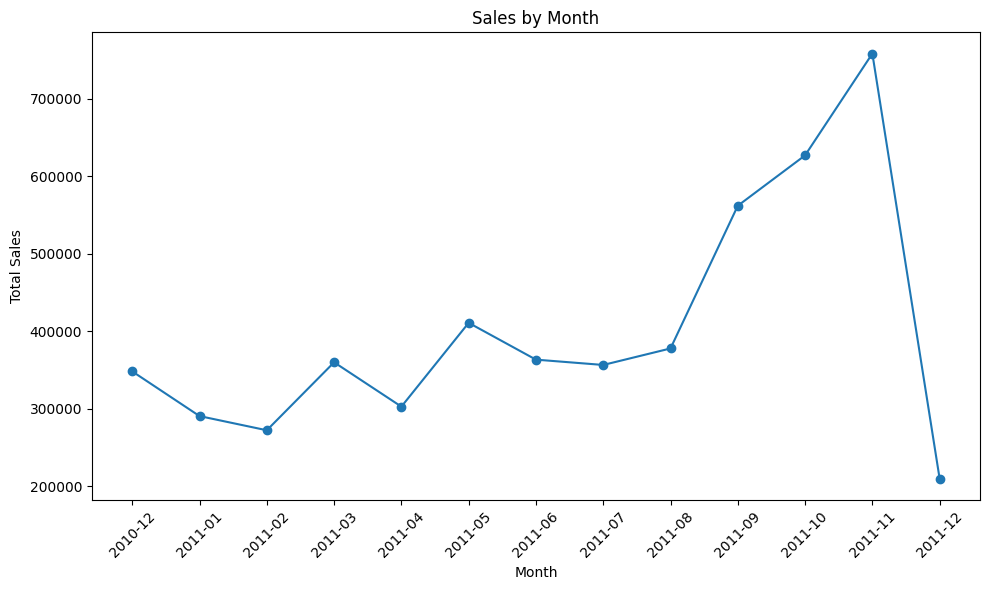

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df contains a 'Date' column and a 'Sales' column

# Ensure 'Date' is in datetime format
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Group data by month and sum the sales for each month
df['Month'] = df['InvoiceDate'].dt.to_period('M')  # Extract month
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()

# Plotting the graph
plt.figure(figsize=(10, 6))
plt.plot(monthly_sales['Month'].astype(str), monthly_sales['Sales'], marker='o', linestyle='-')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Sales by Month')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()
